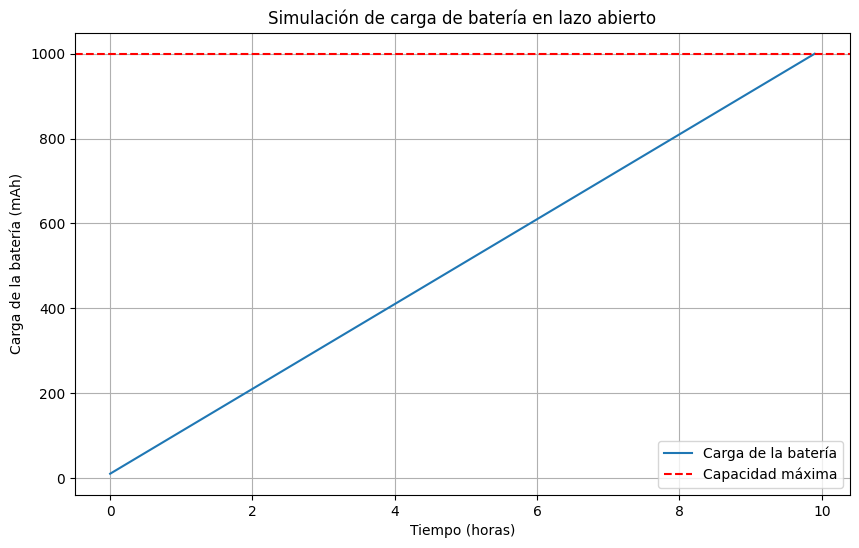

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
capacidad_bateria = 1000  # Capacidad de la batería en mAh
corriente_carga = 100  # Corriente de carga en mA
tiempo_simulacion = 10  # Tiempo de simulación en horas
dt = 0.1  # Paso de tiempo en horas

# Inicializar variables
tiempo = np.arange(0, tiempo_simulacion, dt)
carga_bateria = np.zeros_like(tiempo)
carga_actual = 0

# Simulación en lazo abierto
for t in range(len(tiempo)):
    carga_actual += corriente_carga * dt  # Incrementar la carga de la batería
    carga_bateria[t] = carga_actual

# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.plot(tiempo, carga_bateria, label='Carga de la batería')
plt.axhline(capacidad_bateria, color='r', linestyle='--', label='Capacidad máxima')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Carga de la batería (mAh)')
plt.title('Simulación de carga de batería en lazo abierto')
plt.legend()
plt.grid(True)
plt.show()


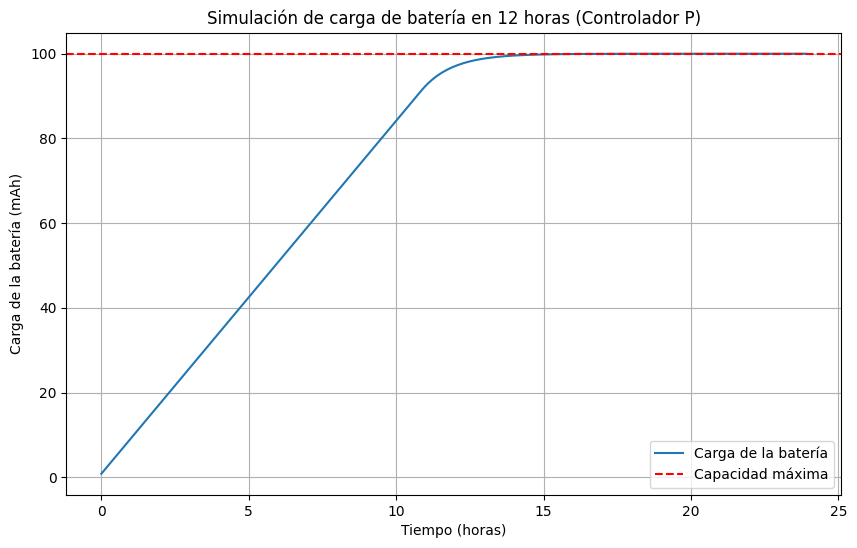

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
capacidad_bateria = 100  # Capacidad de la batería en mAh
tiempo_carga_horas = 12  # Tiempo de carga deseado en horas
corriente_max = capacidad_bateria / tiempo_carga_horas  # Corriente máxima de carga en mA
tiempo_simulacion = 24  # Tiempo de simulación en horas (más largo para visualización)
dt = 0.1  # Paso de tiempo en horas
error_anterior = 0  # Inicializar el error anterior

def controlador_p(error):
    kp = 0.91  # Ganancia proporcional del controlador P
    correccion = kp * error
    return correccion

# Inicializar variables
tiempo = np.arange(0, tiempo_simulacion, dt)
carga_bateria = np.zeros_like(tiempo)
carga_actual = 0

# Simulación en lazo cerrado
for t in range(len(tiempo)):
    error = capacidad_bateria - carga_actual
    correccion = controlador_p(error)
    corriente_carga = min(corriente_max, correccion)  # Limitar la corriente máxima
    carga_actual += corriente_carga * dt
    carga_bateria[t] = carga_actual

# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.plot(tiempo, carga_bateria, label='Carga de la batería')
plt.axhline(capacidad_bateria, color='r', linestyle='--', label='Capacidad máxima')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Carga de la batería (mAh)')
plt.title(f'Simulación de carga de batería en 12 horas (Controlador P)')
plt.legend()
plt.grid(True)
plt.show()


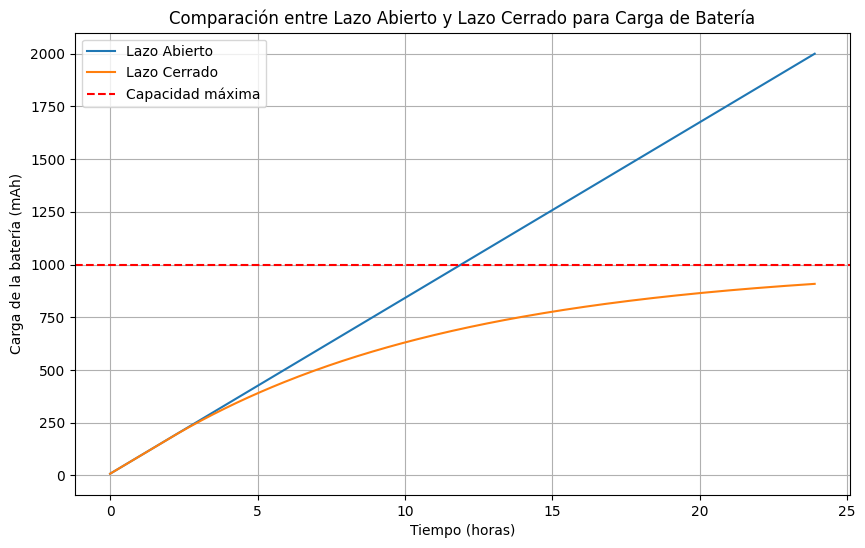

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
capacidad_bateria = 1000  # Capacidad de la batería en mAh
tiempo_carga_horas = 12  # Tiempo de carga deseado en horas
corriente_max = capacidad_bateria / tiempo_carga_horas  # Corriente máxima de carga en mA
tiempo_simulacion = 24  # Tiempo de simulación en horas (más largo para visualización)
dt = 0.1  # Paso de tiempo en horas
error_anterior = 0  # Inicializar el error anterior

def controlador_p(error):
    kp = 0.1  # Ganancia proporcional del controlador P
    correccion = kp * error
    return correccion

# Inicializar variables para lazo cerrado
tiempo = np.arange(0, tiempo_simulacion, dt)
carga_bateria_cerrado = np.zeros_like(tiempo)
carga_actual_cerrado = 0

# Simulación en lazo cerrado
for t in range(len(tiempo)):
    error = capacidad_bateria - carga_actual_cerrado
    correccion = controlador_p(error)
    corriente_carga = min(corriente_max, correccion)  # Limitar la corriente máxima
    carga_actual_cerrado += corriente_carga * dt
    carga_bateria_cerrado[t] = carga_actual_cerrado

# Inicializar variables para lazo abierto
carga_bateria_abierto = np.zeros_like(tiempo)
carga_actual_abierto = 0

# Simulación en lazo abierto
for t in range(len(tiempo)):
    corriente_carga_abierto = corriente_max  # Utilizar corriente máxima en lazo abierto
    carga_actual_abierto += corriente_carga_abierto * dt
    carga_bateria_abierto[t] = carga_actual_abierto

# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.plot(tiempo, carga_bateria_abierto, label='Lazo Abierto')
plt.plot(tiempo, carga_bateria_cerrado, label='Lazo Cerrado')
plt.axhline(capacidad_bateria, color='r', linestyle='--', label='Capacidad máxima')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Carga de la batería (mAh)')
plt.title('Comparación entre Lazo Abierto y Lazo Cerrado para Carga de Batería')
plt.legend()
plt.grid(True)
plt.show()
